In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
fru = pd.read_csv('Fraud_check.csv')

In [168]:
fru

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [169]:
fru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [170]:
fru.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [171]:
fru = pd.get_dummies(fru,columns=['Undergrad','Urban','Marital.Status'],drop_first=True)

In [172]:
fru["TaxInc"] = pd.cut(fru["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky", "Good"])

In [173]:
fru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Taxable.Income          600 non-null    int64   
 1   City.Population         600 non-null    int64   
 2   Work.Experience         600 non-null    int64   
 3   Undergrad_YES           600 non-null    uint8   
 4   Urban_YES               600 non-null    uint8   
 5   Marital.Status_Married  600 non-null    uint8   
 6   Marital.Status_Single   600 non-null    uint8   
 7   TaxInc                  600 non-null    category
dtypes: category(1), int64(3), uint8(4)
memory usage: 17.2 KB


In [174]:
print(fru)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Urban_YES  Marital.Status_Married  Marital.Status_Single TaxInc  
0            1                       0                      1   

In [175]:
fru = pd.get_dummies(fru,columns=["TaxInc"],drop_first=True)

In [176]:
fru.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
590,43018,85195,14,0,1,1,0,1
591,27394,132859,18,1,1,0,1,0
592,68152,75143,16,1,0,0,1,1
593,84775,131963,10,0,1,0,0,1
594,47364,97526,9,0,1,1,0,1
595,76340,39492,7,1,1,0,0,1
596,69967,55369,2,1,1,0,0,1
597,47334,154058,0,0,1,0,0,1
598,98592,180083,17,1,0,1,0,1
599,96519,158137,16,0,0,0,0,1


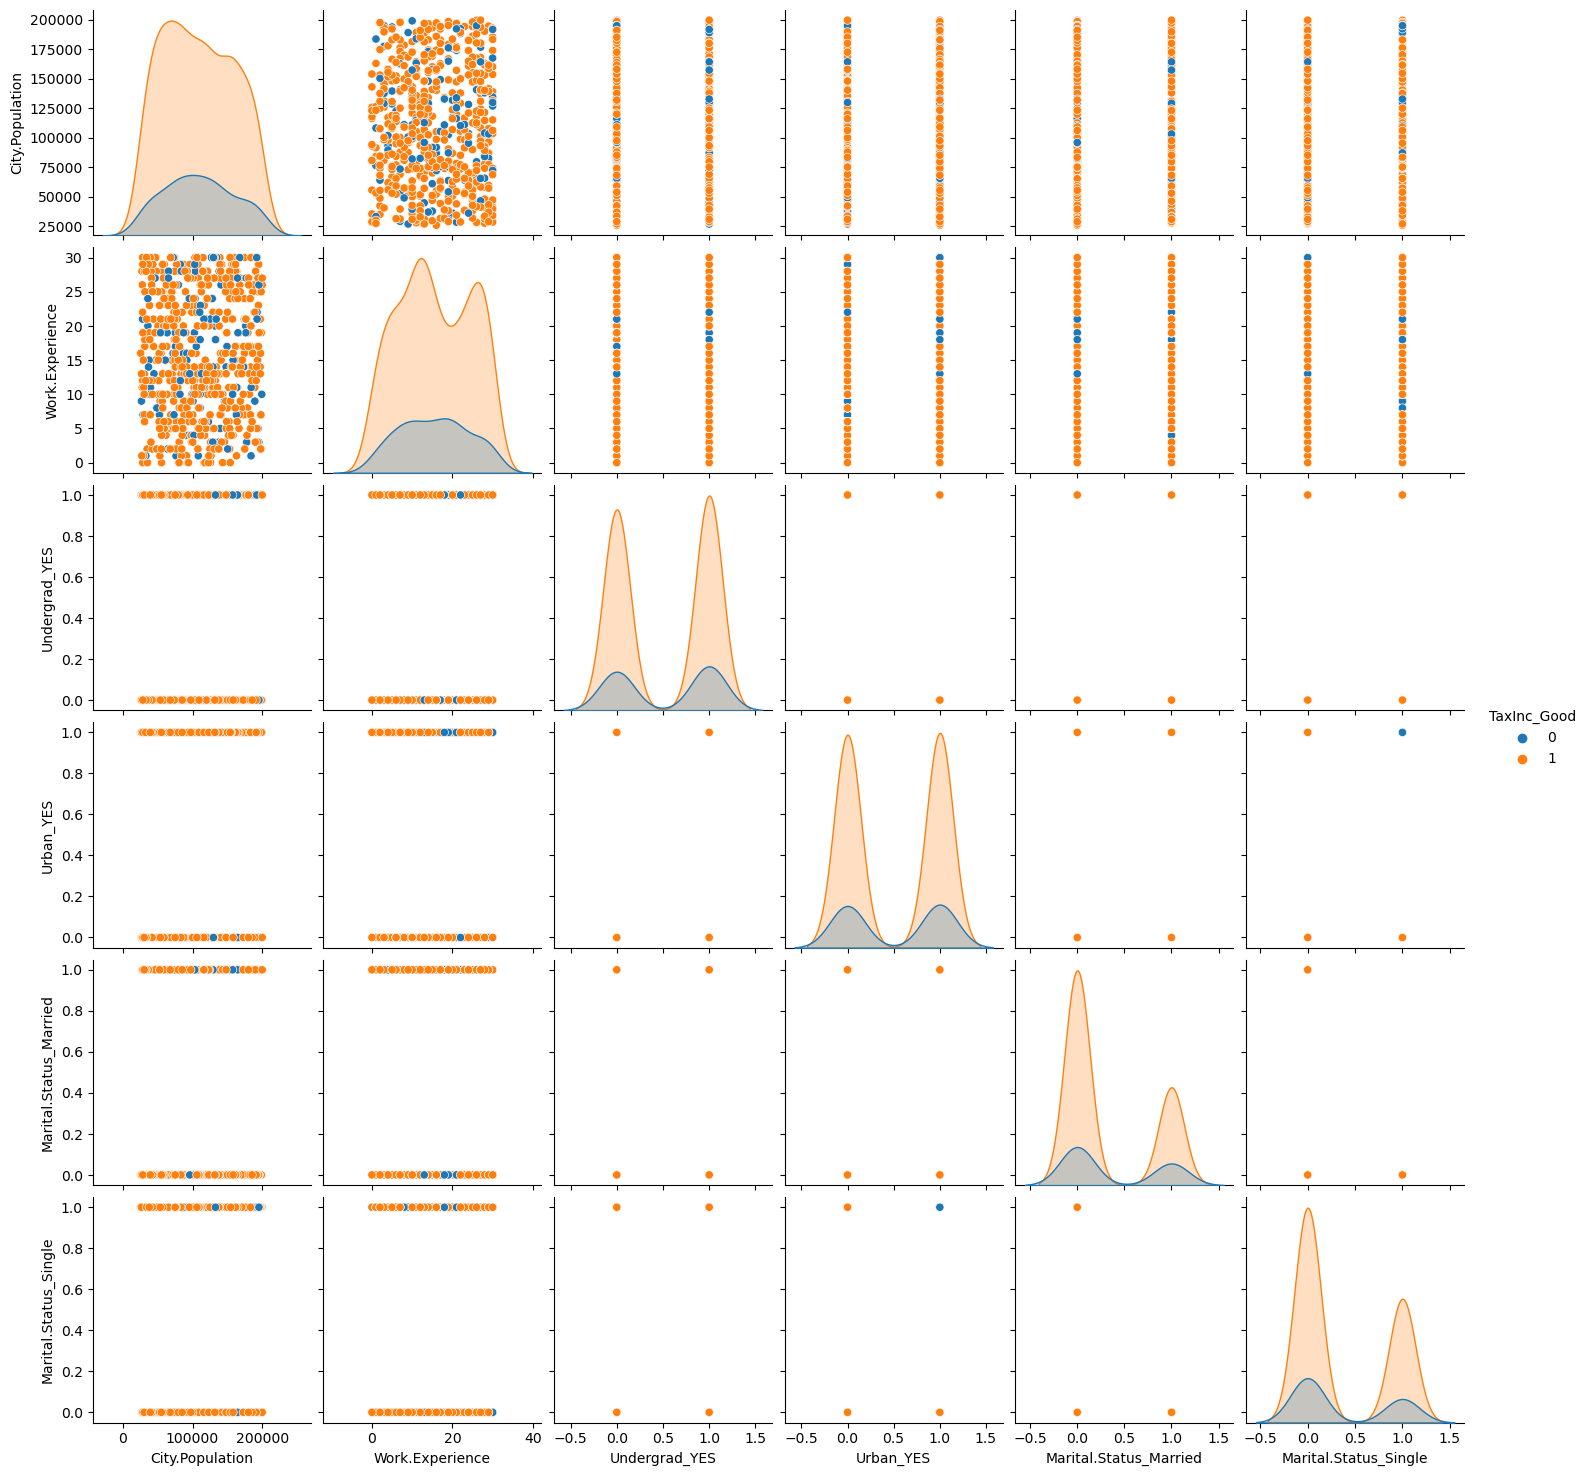

In [241]:
sns.pairplot(data=fru,hue='TaxInc_Good')
plt.show()

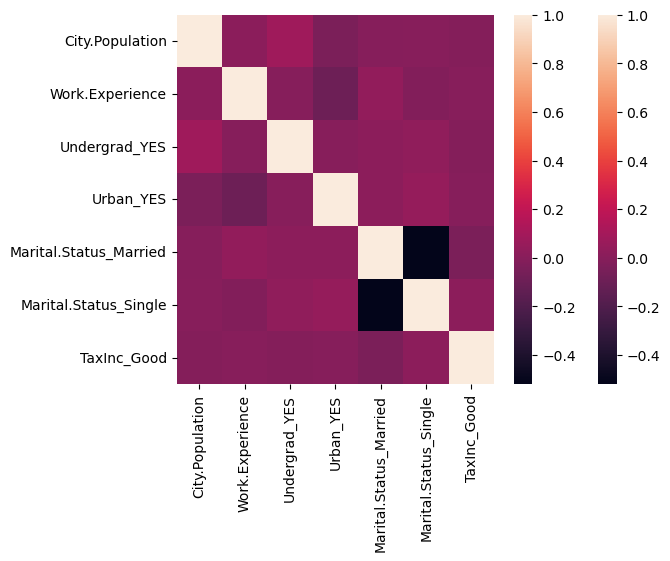

In [243]:
sns.heatmap(fru.corr())
plt.show()

In [178]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [179]:
fru_norm = norm_func(fru.iloc[:,1:])
fru_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,0.0,1.0,1.0
593,0.610256,0.333333,0.0,1.0,0.0,0.0,1.0
594,0.412341,0.300000,0.0,1.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,1.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,0.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [180]:
X = fru_norm.drop(['TaxInc_Good'],axis=1)

In [181]:
y = fru_norm['TaxInc_Good']

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
Xtrain,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [184]:
fru_norm["income"]="<=30000"
fru_norm.loc[fru["Taxable.Income"]>=30000,"income"]="Good"
fru_norm.loc[fru["Taxable.Income"]<=30000,"income"]="Risky"

In [185]:
fru.drop(["Taxable.Income"],axis=1,inplace=True)

In [186]:
features = fru.iloc[:,0:5]
labels = fru.iloc[:,5]

In [187]:
colnames = list(fru.columns)
predictors = colnames[0:5]
target = colnames[5]

In [188]:
colnames = list(fru.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Urban_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'TaxInc_Good']

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size= 0.2,stratify = labels)

In [190]:
dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [191]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

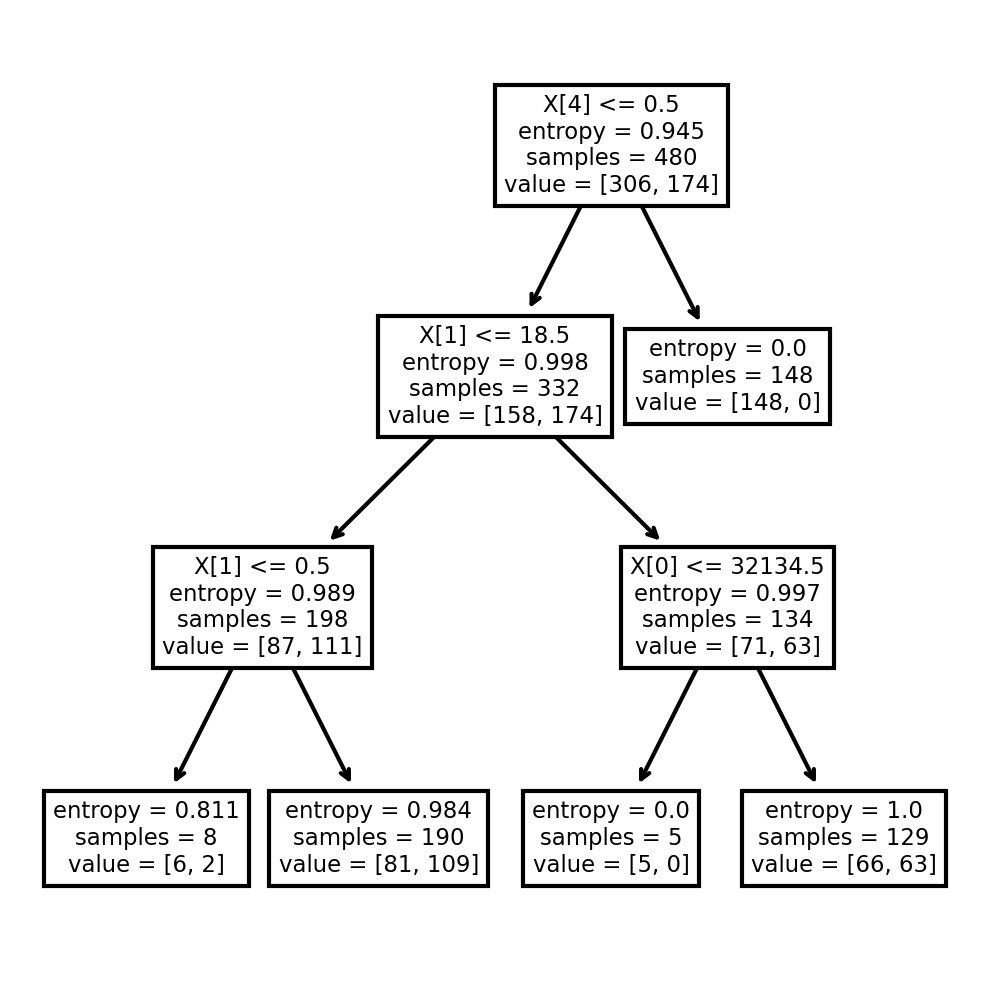

In [207]:
from sklearn import tree
tree.plot_tree(dec_tree);
plt.show()

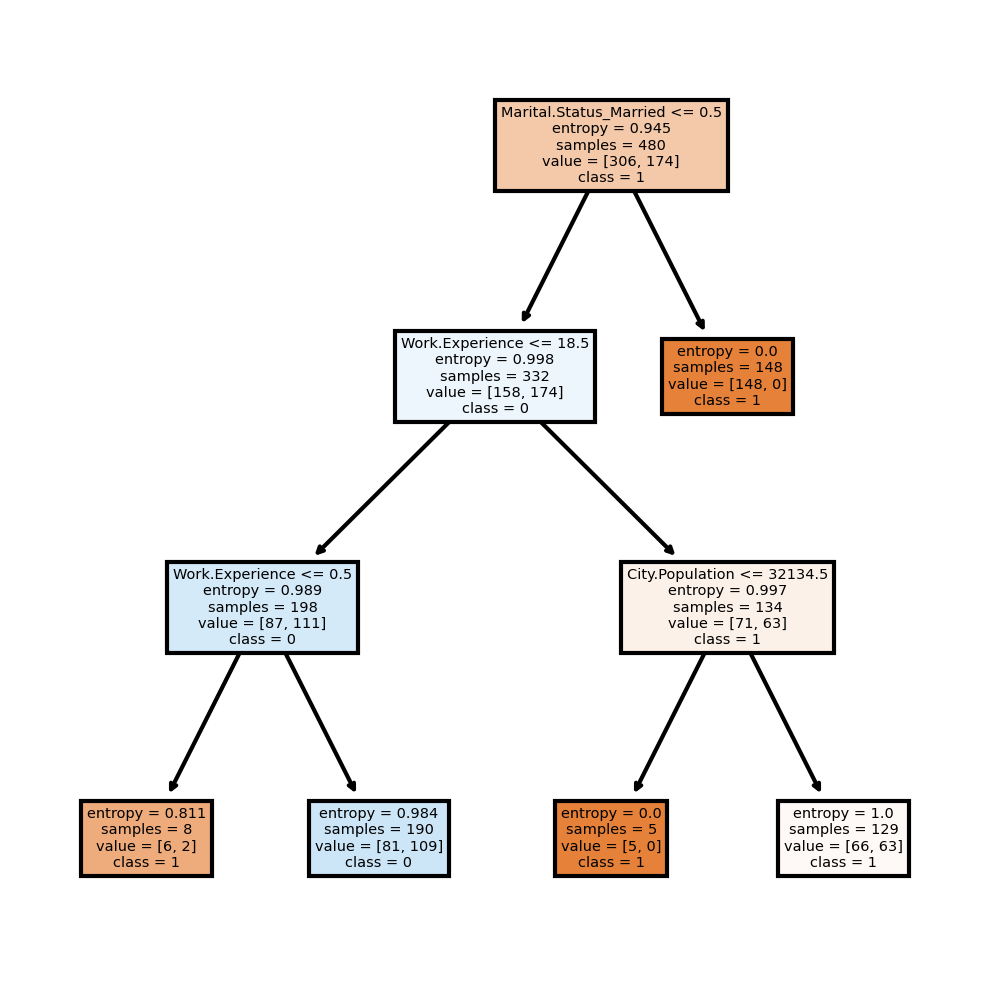

In [210]:
fn=['City.Population','Work.Experience','Undergrad_YES','Urban_YES','Marital.Status_Married','Marital.Status_Single','TaxInc_Good']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dec_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [212]:
y_pred = dec_tree.predict(x_test)
pd.Series(y_pred).value_counts()

0    67
1    53
dtype: int64

In [214]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=uint8)

In [215]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Marital.Status_Single,,
0,51,26
1,16,27


In [219]:
np.mean(y_pred==y_test)

0.65

In [221]:
accuracy_score(y_test,y_pred)

0.5166666666666667

In [222]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [223]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [227]:
accuracy_score(y_test,y_pred)

0.5166666666666667

In [228]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
array = fru_norm.values
x = array[:,0:3]
y=array[:,3]

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=100)

In [237]:
model = DecisionTreeRegressor()

In [238]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [239]:
model.score(x_test,y_test)

-1.0668541364296078